# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.



## Get the data

The images we are working with are from the Food101 dataset 🇰
However, we have modified it to only use two classes (pizza and steak) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

In [2]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2023-01-02 04:22:51--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.128.128, 142.251.6.128, 108.177.112.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.128.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   121MB/s    in 0.9s    

2023-01-02 04:22:52 (121 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data

A very crucial step at the begining of any machine learning project is becoming one with the data.

And for a computer vision project.. this usually means visualizing many samples of your data

In [6]:
!ls pizza_steak

test  train


In [7]:
!ls pizza_steak/train/

pizza  steak


In [8]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [9]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirname,filenames in os.walk('pizza_steak'):
  print(f'There are {len(dirname)} directories and {len(filenames)} images in {dirpath}')

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza


In [10]:
# Another way to find out how many images in a file
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))
num_steak_images_train

750

To visualize our images, first let's get the class names programmatically

In [11]:
# Get the classnames programmatically 
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # Created a list of class_names from sub directories
print(class_names)

['pizza' 'steak']


In [25]:
# Let's visualize our iamges
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');

  print(f'Image shape: {img.shape}')

  return img

['2301105.jpg']
Image shape: (384, 512, 3)


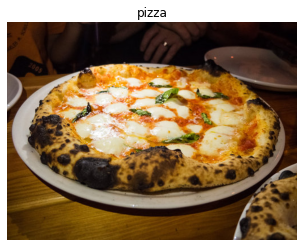

In [26]:
img = view_random_image(target_dir = 'pizza_steak/train/',
                  target_class='pizza')

In [29]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 61,  25,   3],
        [ 63,  27,   5],
        [ 64,  28,   6],
        ...,
        [ 23,   8,   5],
        [ 24,   9,   6],
        [ 23,   8,   5]],

       [[ 61,  25,   3],
        [ 63,  27,   5],
        [ 64,  28,   6],
        ...,
        [ 19,   4,   1],
        [ 19,   4,   1],
        [ 18,   3,   0]],

       [[ 61,  25,   3],
        [ 63,  27,   5],
        [ 63,  27,   5],
        ...,
        [ 18,   3,   0],
        [ 17,   2,   0],
        [ 15,   0,   0]],

       ...,

       [[ 60,  33,   4],
        [ 59,  32,   2],
        [ 61,  34,   4],
        ...,
        [109,  81,  33],
        [101,  73,  25],
        [ 92,  64,  16]],

       [[ 63,  34,   4],
        [ 62,  33,   1],
        [ 64,  35,   1],
        ...,
        [110,  82,  34],
        [103,  75,  27],
        [ 94,  66,  18]],

       [[ 72,  43,  11],
        [ 70,  41,   7],
        [ 70,  42,   5],
        ...,
        [108,  80,  3

In [30]:
# View the Image shape
img.shape

(384, 512, 3)

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we nee a awy to:
* Load our images
* Preprocess our images
* Build a CNN 
* Compile our CNN
* Fit the CNN

In [3]:
from matplotlib.rcsetup import validate_animation_writer_path
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (Normalize)
train_datagen  = ImageDataGenerator(rescale=1/255.0)
valid_datagen = ImageDataGenerator(rescale=1/255.0)

# Setup paths to our data directories
train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224,224,3)),

    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
                               
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

# Compile the Model
model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

#Fir the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data)) # Only pass X since the labels are automatically created by the ImageGenerator

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 19s 213ms/step - loss: 0.5701 - accuracy: 0.6820 - val_loss: 0.3800 - val_accuracy: 0.8320
Epoch 2/5
47/47 [==============================] - 9s 196ms/step - loss: 0.4235 - accuracy: 0.7993 - val_loss: 0.3459 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 9s 199ms/step - loss: 0.3770 - accuracy: 0.8380 - val_loss: 0.3130 - val_accuracy: 0.8720
Epoch 4/5
47/47 [==============================] - 9s 199ms/step - loss: 0.3328 - accuracy: 0.8627 - val_loss: 0.3227 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 10s 218ms/step - loss: 0.2718 - accuracy: 0.8900 - val_loss: 0.2967 - val_accuracy: 0.8620


**Note:** If the above cell takes longer than ~10 seconds per epoch, make sure you are using a GPU at runtime

In [4]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

**Practice** : https://poloclub.github.io/cnn-explainer/